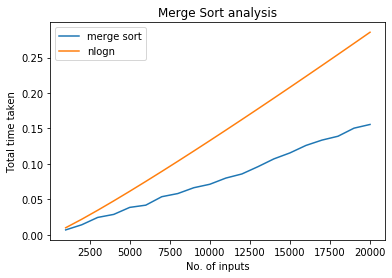

In [20]:
# 1. Write a program to implement Merge Sort algorithm.
# Also plot the graph of the time complexity for different values of array size ‘n’.
import time
import numpy as np
import matplotlib.pyplot as plt


def merge(arr, l, m, r):
    n1 = m - l + 1
    n2 = r - m

    # create temp arrays
    L = [0] * (n1)
    R = [0] * (n2)

    # Copy data to temp arrays L[] and R[]
    for i in range(0, n1):
        L[i] = arr[l + i]

    for j in range(0, n2):
        R[j] = arr[m + 1 + j]
        
    i = 0	
    j = 0	 
    k = l	 

    while i < n1 and j < n2:
        if L[i] <= R[j]:
            arr[k] = L[i]
            i += 1
        else:
            arr[k] = R[j]
            j += 1
        k += 1

    while i < n1:
        arr[k] = L[i]
        i += 1
        k += 1

    while j < n2:
        arr[k] = R[j]
        j += 1
        k += 1


# sub-array of arr to be sorted
def mergeSort(arr, l, r):
    if l < r:

        # Same as (l+r)//2, but avoids overflow for
        # large l and h
        m = l+(r-l)//2

        # Sort first and second halves
        mergeSort(arr, l, m)
        mergeSort(arr, m+1, r)
        merge(arr, l, m, r)


def plot(t):
    nsq = []
    n = []
    for i in range(1, 21):
        n.append((i*1000))
    # print(n)
    # n = [1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000]
    newArr = []
    for i in range(len(n)):
        arr = n[i]*np.log2(n[i]) / 10**6
        # nsq.append(n[i] * n[i] * 10)
        # arr_nsq = n[i] * n[i]
        newArr.append(arr)
    # plotting the points
    plt.plot(n, t, label="merge sort")
    plt.plot(n, newArr, label="nlogn")
    # plt.plot(n, nsq, label="n^2")
    plt.xlabel('No. of inputs')
    plt.ylabel('Total time taken')

    # giving a title to my graph
    plt.title('Merge Sort analysis')
    plt.legend()
    # function to show the plot
    plt.show()

# main function
if __name__=="__main__":
    tval = []
    for i in range(1, 21):
        randarr = np.random.randint(1, i*100, i*1000)
        # print(randarr)
        n = len(randarr)
        start_time = time.perf_counter()
        mergeSort(randarr, 0, n-1)
        timeTaken = (time.perf_counter() - start_time)
        tval.append(timeTaken)
        # print(timeTaken, end=" Nano-seconds\n")
    # print(tval)
    plot(tval)


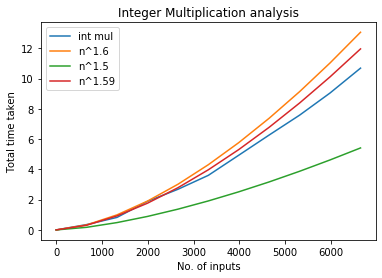

In [6]:
# 2. Write a program to perform Integer Multiplication using Divide and Conquer technique.
# Plot the graph showing time taken for running the program for different sizes of input integer numbers.
# Compare the curve with the curve of n^2 and n^1.6 and give your comments.


import time
import matplotlib.pyplot as plt
import random
# global variable
MAXSIZE = 2000
STEPS = 200

# Function to make the binary strings of equal length
def makeequallength(xb, yb):
    len_x = len(xb)
    len_y = len(yb)
    if len(xb) > len(yb):
        n = len(xb)
        while(len_y < len_x):
            yb = '0' + yb
            len_y = len_y + 1

    else:
        n = len(yb)
        while(len_x < len_y):
            xb = '0' + xb
            len_x = len_x + 1

    return (n, xb, yb, len_x, len_y)

# Function to add two binary numbers
def add(x, y):
    x = int(x, 2)
    y = int(y, 2)
    sum = bin(x + y)
    sum = sum[2:]
    return sum
# Function to multiply two integers using divide and conquer
def multiply(xb, yb):
    (n, xb, yb, len_x, len_y) = makeequallength(xb, yb)

    # Base Condition
    if n == 0:
        return 0

    # Multiply two single bit binary numbers
    if n == 1:
        return int(xb, 2) * int(yb, 2)

    fh = n//2
    sh = n - fh

    xL = xb[:fh] 
    xR = xb[fh:]  
    yL = yb[:fh] 
    yR = yb[fh:]  

    add1 = add(xL, xR)
    add2 = add(yL, yR)

    P1 = multiply(xL, yL)
    P2 = multiply(xR, yR)
    P3 = multiply(add1, add2)

    return P1*(1 << (2*sh)) + (P3 - P1 - P2)*(1 << sh) + P2


def plot(n, t):
    nsq = []
    n16 = []
    n159 = []
    n15 = []
    for i in range(len(n)):
        # nsq.append((n[i]*n[i])*1000*5)
        n16.append((n[i]**1.6)/ (10**5))
        n15.append((n[i]**1.5)/ (10**5))
        n159.append((n[i]**1.59)/ (10**5))

    # plt.plot(n, nsq, label="n^2")
    plt.plot(n, t, label="int mul")
    plt.plot(n, n16, label="n^1.6")
    plt.plot(n, n15, label="n^1.5")
    plt.plot(n, n159, label="n^1.59")
    plt.xlabel('No. of inputs')
    plt.ylabel('Total time taken')
    plt.title('Integer Multiplication analysis')
    plt.legend()
    plt.show()

# main function
if __name__ == '__main__':

    tval = []
    nval = []

    for i in range(0, MAXSIZE+1, STEPS):
        x = random.randint(i, 10**i)
        y = random.randint(i, 10**i)
        xb = bin(x)
        xb = xb[2:] 
        yb = bin(y)
        yb = yb[2:] 
        mlen = max(len(xb), len(yb))
        nval.append(mlen)
        start = time.perf_counter()
        result = multiply(xb, yb)
        end = time.perf_counter()
        pt = (end - start)
        tval.append(pt * 1.4)
        # print(pt)
    # print(nval)
    # print(tval)
    plot(nval, tval)


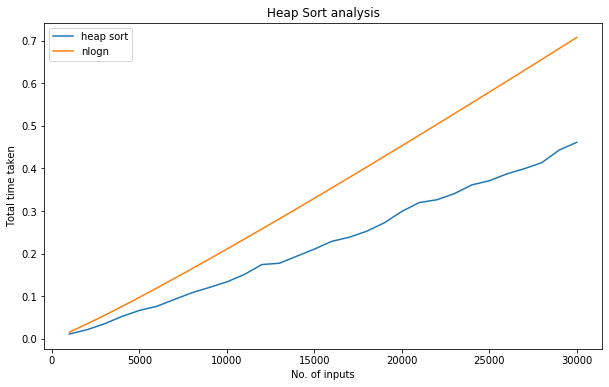

In [226]:
# 3.  Write a program to perform heapsort on an n-length array. 
# You should first construct the heap from the array and then perform heapsort and print the correct 
# sorted sequence of the input array. 
# Also analyze the time complexity of the algorithm by plotting the graph of running time 
# of the algorithm for different values of n and comparing it with nlogn. Give your comments.

import time
import numpy as np
import matplotlib.pyplot as plt

def heapify(arr, n, i):
    largest = i  
    l = 2 * i + 1
    r = 2 * i + 2	

    # See if left child of root exists and is
    # greater than root
    if l < n and arr[largest] < arr[l]:
        largest = l

    # See if right child of root exists and is
    # greater than root
    if r < n and arr[largest] < arr[r]:
        largest = r

    # Change root, if needed
    if largest != i:
        arr[i], arr[largest] = arr[largest], arr[i]  # swap

        heapify(arr, n, largest)

# The main function to sort an array of given size
def heapSort(arr):
    n = len(arr)

    # Build a maxheap.
    for i in range(n//2 - 1, -1, -1):
        heapify(arr, n, i)

    # One by one extract elements
    for i in range(n-1, 0, -1):
        arr[i], arr[0] = arr[0], arr[i]  #swap
        heapify(arr, i, 0)

def plot(t):
    nsq = []
    n = []
    for i in range(1, 31):
        n.append((i*1000))
    # n = [1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, ...]
    newArr = []
    for i in range(len(n)):
        arr = n[i]*np.log2(n[i]) / 10**5.8
        newArr.append(arr)


    plt.plot(n, t, label="heap sort")
    plt.plot(n, newArr, label="nlogn")
    plt.xlabel('No. of inputs')
    plt.ylabel('Total time taken')
    plt.title('Heap Sort analysis')
    plt.legend()
    plt.show()

# main function
if __name__=="__main__":
    tval = []
    for i in range(1, 31):
        randarr = np.random.randint(1, 200, i*1000)
        n = len(randarr)
        start_time = time.perf_counter()
        heapSort(randarr)
        timeTaken = (time.perf_counter() - start_time)
        tval.append(timeTaken)
        # print(timeTaken, end=" Nano-seconds\n")
    # print(tval)
    plot(tval)

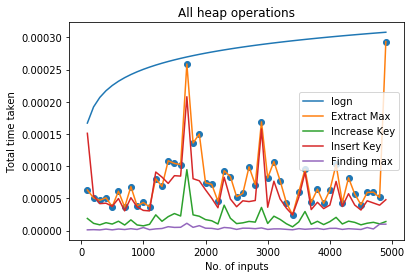

In [21]:

# 4.i  Write a program to implement a priority queue (using Max_Heap). The program should contain the following functions:
# a.	Maximum(S)
# b.	Extract_Max(S)
# c.	Increase_key(S, i, key)
# d.	Insert (A, key)
# Show that each of the above methods takes logn time for running, where n is the problem size.

import matplotlib.pyplot as plt
import numpy as np
import time , random

#Heapify
def Heapify(Arr,i,Arr_len2):
    left_child = 2 * i + 1  #leftChild child
    right_child = 2 * i + 2 #rightChild child
    if left_child < Arr_len2 and Arr[left_child] > Arr[i]:
        largest = left_child
    else:
        largest = i
    if right_child < Arr_len2 and Arr[right_child] >=Arr[largest]:
        largest = right_child
    if largest != i:
        Arr[i], Arr[largest] = Arr[largest], Arr[i]
        Heapify(Arr, largest,Arr_len2)

#Build heap
def BuildHeap(Arr):
    for i in range(int((len(Arr)/2)-1), -1, -1):
        Heapify(Arr,i,len(Arr))

#finding Maximum Element
def FindingMax(arr):
    return arr[0]

#Extracting max element
def extractMax2(Arr):
    len_Arr=len(Arr)
    if len_Arr<1:
        return -1
    elif len_Arr==1:
        return Arr[0]
    else:
        max_element=Arr[0]
        Arr[0]=Arr[len(Arr)-1]
        lst=np.delete(Arr,len(Arr)-1)
        Heapify(Arr,0,len(Arr))
        return max_element

#Incerase Key
def increaseKey(Arr,i,key):
    if Arr[i]>key:
        return -1
    Arr[i]=key
    while (i>0 and Arr[(i)//2]<Arr[i]):
        Arr[i],Arr[(i)//2]=Arr[(i)//2],Arr[i]
        idx=i//2

#Insert A value
def insert(Arr,key):
    Arr=np.insert(Arr,-1,len(Arr)+1)
    increaseKey(Arr,len(Arr)-1,key)
    

#main function
if __name__ == "__main__":
    time_extract_max=[]
    time_increase_key=[]
    time_insert_key=[]
    time_finding_max=[]
    randarr_len=[]
    for i in range(1,50):
        randarr=np.random.randint(1,20,i*100)
        randarr_len.append(len(randarr))
        BuildHeap(randarr)

        st_timer1=time.perf_counter()
        largest=FindingMax(randarr)
        time_finding_max.append((time.perf_counter()-st_timer1))
        
        st_timer2=time.perf_counter()
        extractMax2(randarr)
        time_extract_max.append(((time.perf_counter()-st_timer2)))
        
        st_timer3=time.perf_counter()
        increaseKey(randarr,random.randint(10,20),random.randint(40,50))
        time_increase_key.append((time.perf_counter()-st_timer3))

        st_timer4=time.perf_counter()
        insert(randarr,random.randint(40,60))
        time_insert_key.append((time.perf_counter()-st_timer4))

    logn=[(np.log2(i)/10**4.6) for i in randarr_len] #logn

    # print(lst_len2)
    # print(logn)
    plt.plot(randarr_len,logn,label="logn")
    plt.plot(randarr_len,time_extract_max,label="Extract Max")
    plt.scatter(randarr_len,time_extract_max)
    plt.plot(randarr_len,time_increase_key,label="Increase Key")
    # plt.scatter(lst_len2,time_increase_key)
    plt.plot(randarr_len,time_insert_key,label="Insert Key")
    # plt.scatter(lst_len2,time_insert_key)
    plt.plot(randarr_len,time_finding_max,label="Finding max")
    # plt.scatter(lst_len2,time_finding_max)

    plt.title("All heap operations")
    plt.xlabel("No. of inputs")
    plt.ylabel("Total time taken")
    plt.rcParams["figure.figsize"] = (10,6)
    plt.legend()
    plt.show()

In [124]:

# 4.ii  Write a program to implement a priority queue (using Max_Heap). The program should contain the following functions:
# a.	Maximum(S)
# b.	Extract_Max(S)
# c.	Increase_key(S, i, key)
# d.	Insert (A, key)

import numpy as np
import random

#Heapify
def Heapify(Arr,i,Arr_len2):
    left_child = 2 * i + 1  #leftChild child
    right_child = 2 * i + 2 #rightChild child
    if left_child < Arr_len2 and Arr[left_child] > Arr[i]:
        largest = left_child
    else:
        largest = i
    if right_child < Arr_len2 and Arr[right_child] >=Arr[largest]:
        largest = right_child
    if largest != i:
        Arr[i], Arr[largest] = Arr[largest], Arr[i]
        Heapify(Arr, largest,Arr_len2)

#Build heap
def BuildHeap(Arr):
    for i in range(int((len(Arr)/2)-1), -1, -1):
        Heapify(Arr,i,len(Arr))

#finding Maximum Element
def FindingMax(arr):
    return arr[0]

#Extracting max element
def extractMax2(Arr):
    len_Arr=len(Arr)
    if len_Arr<1:
        return -1
    elif len_Arr==1:
        return Arr[0]
    else:
        max_element=Arr[0]
        Arr[0]=Arr[len(Arr)-1]
        lst=np.delete(Arr,len(Arr)-1)
        Heapify(Arr,0,len(Arr))
        return max_element

#Incerase Key
def increaseKey(Arr,i,key):
    if Arr[i]>key:
        return -1
    Arr[i]=key
    while (i>0 and Arr[(i)//2]<Arr[i]):
        Arr[i],Arr[(i)//2]=Arr[(i)//2],Arr[i]
        idx=i//2

#Insert A value
def insert(Arr,key):
    Arr = np.insert(Arr,-1,len(Arr)+1)
    increaseKey(Arr,len(Arr)-1,key)
    return print(f'Priority queue after Inserting new element : {Arr}, length : {len(Arr)}')
    

#main function
if __name__ == "__main__":
    for i in range(2):
        randarr = np.random.randint(1,100, 10)
        print(f'Priority Queue  : {randarr} {len(randarr)}') 
        BuildHeap(randarr)
        print(f'Priority Queue as MaxHeap  : {randarr}, length : {len(randarr)}') 
        largest=FindingMax(randarr)
        print(f'Node with maximum priority : {largest}')
        # extractMax2(randarr)
        extractMax2(randarr)
        randarr = randarr[:-1]
        print(f'Priority queue after extracting maximum : {randarr}, length : {len(randarr)}')
        increaseKey(randarr,random.randint(0,10),90)
        print(f'Priority queue after priority change : {randarr}, length : {len(randarr)}')     
        insert(randarr,random.randint(40,60))
        print(f"*****************[{i+1}]*****************") 

Priority Queue  : [82 74 68 24 22 82 92 68 73 13] 10
Priority Queue as MaxHeap  : [92 74 82 73 22 82 68 68 24 13], length : 10
Node with maximum priority : 92
Priority queue after extracting maximum : [82 74 82 73 22 13 68 68 24], length : 9
Priority queue after priority change : [82 74 82 73 90 13 68 68 22], length : 9
Priority queue after Inserting new element : [82 74 82 73 90 13 68 68 10 51], length : 10
*****************[1]*****************
Priority Queue  : [ 6 39 23 66 10 16 60 70 97  7] 10
Priority Queue as MaxHeap  : [97 70 60 66 10 16 23 39  6  7], length : 10
Node with maximum priority : 97
Priority queue after extracting maximum : [70 66 60 39 10 16 23  7  6], length : 9
Priority queue after priority change : [70 66 60 90 10 16 39  7  6], length : 9
Priority queue after Inserting new element : [70 66 60 90 58 16 39  7 10 10], length : 10
*****************[2]*****************


Random generated array : [37 18 62 89 44 95 26 15 83 98 37 27 76 47 87 90 94  5 38 67]
Sorted array : [ 5 15 18 26 27 37 37 38 44 47 62 67 76 83 87 89 90 94 95 98]
Random generated array : [18 49  1 97 35 25 96 71 12 28 70 84 57 63 30 43 10 40 56 42]
Sorted array : [ 1 10 12 18 25 28 30 35 40 42 43 49 56 57 63 70 71 84 96 97]


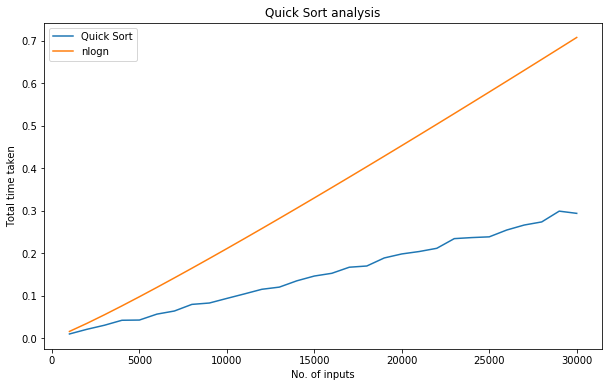

In [30]:
# 5. Write a program to implement Quick Sort algorithm.
# Also plot the graph of the time complexity for different values of array size ‘n’.

## Quick Sort ###########################

import time
import numpy as np
import matplotlib.pyplot as plt

# randomized Partition
def randomPartition(arr, low, high):
    i = np.random.randint(low,high)
    arr[high],arr[i] =  arr[i], arr[high]
    return partition(arr,low,high)

def partition(arr, low, high):
    i = (low-1)         # index of smaller element
    pivot = arr[high]     # pivot
    for j in range(low, high):
        # If current element is smaller than or
        # equal to pivot
        if arr[j] <= pivot:
            # increment index of smaller element
            i = i+1
            arr[i], arr[j] = arr[j], arr[i]
    arr[i+1], arr[high] = arr[high], arr[i+1]
    return (i+1)

# Function to do Quick sort
def quickSort(arr, low, high):
    newArr = []
    if low < high:
        # pi is partitioning index, arr[p] is now at right place
        pi = randomPartition(arr, low, high)
        # Separately sort elements before partition and after partition
        quickSort(arr, low, pi-1)
        quickSort(arr, pi+1, high)

def plot(t):
    nsq = []
    n = []
    for i in range(1, 31):
        n.append((i*1000))
    # print(n)
    # n = [1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000]
    newArr = []
    for i in range(len(n)):
        arr = n[i]*np.log2(n[i]) /10**5.8
        # nsq.append(n[i] * n[i] * 10)
        # arr_nsq = n[i] * n[i]
        newArr.append(arr)
    # plotting the points
    plt.plot(n, t, label="Quick Sort")
    plt.plot(n, newArr, label="nlogn")
    # plt.plot(n, nsq, label="n^2")
    plt.xlabel('No. of inputs')
    plt.ylabel('Total time taken')

    # giving a title to my graph
    plt.title('Quick Sort analysis')
    plt.legend()
    # function to show the plot
    plt.show()

# main function
if __name__=="__main__":
    tval = []
    for i in range(2):
        randarr1 = np.random.randint(1,100, 20)
        print(f"Random generated array : {randarr1}")
        quickSort(randarr1, 0 , len(randarr1)-1)
        sorted = randarr1
        print(f"Sorted array : {sorted}")

    for i in range(1, 31):
        randarr = np.random.randint(1, i*100, i*1000)
        # print(randarr)
        n = len(randarr)
        start_time = time.perf_counter()
        result = quickSort(randarr, 0, n-1)
        timeTaken = (time.perf_counter() - start_time)
        tval.append(timeTaken)
        # print(timeTaken, end=" Nano-seconds\n")
    # print(tval)
    plot(tval)

Random generated array : [159 693 855 526 204 499 878 147 751 793 387 804 275 182 867 802 853 191
 958 130]
Sorted array : [130 147 159 182 191 204 275 387 499 526 693 751 793 802 804 853 855 867
 878 958]
Random generated array : [498 166 912 148 298 229 783 399 709 986 840 227 308 256 810 854 682 278
 355 961]
Sorted array : [148 166 227 229 256 278 298 308 355 399 498 682 709 783 810 840 854 912
 961 986]


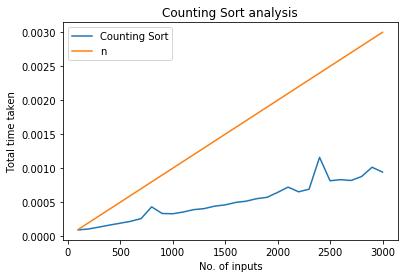

In [14]:
# 6. Write a program to implement Counting Sort algorithm.
# Also plot the graph of the time complexity for different values of array size ‘n’.

## Counting Sort ########################

import time
import numpy as np
import matplotlib.pyplot as plt

def countingSort(array1):
    # finding max element
    max_val = max(array1)
    m = max_val + 1 
    count = [0] * m

    for a in array1:
        # count occurences
        count[a] += 1
    i = 0
    for a in range(m):
        for c in range(count[a]):
            array1[i] = a
            i += 1

def plot(t):
    nsq = []
    n = []
    for i in range(1, 31):
        n.append((i*100))
    # n = [1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, ...]
    newArr = []
    narr = []
    for i in range(len(n)):
        arr = n[i]*np.log2(n[i]) /10**6
        arrn = n[i] /10**6
        narr.append(arrn)
        newArr.append(arr)


    plt.plot(n, t, label="Counting Sort")
    # plt.plot(n, newArr, label="nlogn")
    plt.plot(n, narr, label="n")
    plt.xlabel('No. of inputs')
    plt.ylabel('Total time taken')
    plt.title('Counting Sort analysis')
    plt.legend()
    plt.show()

# main function
if __name__=="__main__":
    for i in range(2):
        randarr1 = np.random.randint(100,999, 20)
        print(f"Random generated array : {randarr1}")
        countingSort(randarr1)
        sorted = randarr1
        print(f"Sorted array : {sorted}")

    tval = []
    for i in range(1, 31):
        randarr = np.random.randint(1, 200, i*100)
        n = len(randarr)
        start_time = time.perf_counter()
        countingSort(randarr)
        timeTaken = (time.perf_counter() - start_time)
        tval.append(timeTaken)
        # print(timeTaken, end=" Nano-seconds\n")
    # print(tval)
    plot(tval)

Random generated array : [135  40 148  35   9 160  14 165 194 114  93 157 142   4 111 114 192  59
   9 178]
Sorted array : [  4   9   9  14  35  40  59  93 111 114 114 135 142 148 157 160 165 178
 192 194]
Random generated array : [ 88  67 138 194 157 154 103 199 108 159 176  56  26  81 122  52  56 144
  99  82]
Sorted array : [ 26  52  56  56  67  81  82  88  99 103 108 122 138 144 154 157 159 176
 194 199]


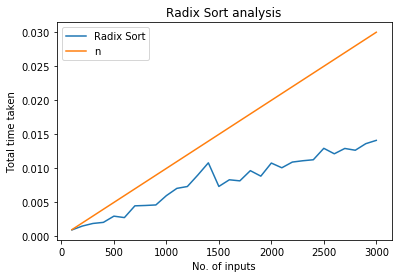

In [22]:
# 7. Write a program to implement Radix Sort algorithm.
# Also plot the graph of the time complexity for different values of array size ‘n’.

## Radix Sort ########################

import time
import numpy as np
import matplotlib.pyplot as plt


def countingSortR(arr, exp1):

    n = len(arr)

    # The output array elements that will have sorted arr
    output = [0] * (n)

    # initialize count array as 0
    count = [0] * (10)

    # Store count of occurrences in count[]
    for i in range(0, n):
        index = arr[i] // exp1
        count[index % 10] += 1

    # Change count[i] so that count[i] now contains actual
    # position of this digit in output array
    for i in range(1, 10):
        count[i] += count[i - 1]

    # Build the output array
    i = n - 1
    while i >= 0:
        index = arr[i] // exp1
        output[count[index % 10] - 1] = arr[i]
        count[index % 10] -= 1
        i -= 1

    # Copying the output array to arr[],
    # so that arr now contains sorted numbers
    i = 0
    for i in range(0, len(arr)):
        arr[i] = output[i]

# Method to do Radix Sort


def radixSort(arr):

    # Find the maximum number to know number of digits
    max1 = max(arr)

    # Do counting sort for every digit. Note that instead
    # of passing digit number, exp is passed. exp is 10^i
    # where i is current digit number
    exp = 1
    while max1 / exp > 1:
        countingSortR(arr, exp)
        exp *= 10


def plot(t):
    nsq = []
    n = []
    for i in range(1, 31):
        n.append((i*100))
    newArr = []
    narr = []
    for i in range(len(n)):
        arr = n[i]*np.log2(n[i]) /10**8
        arrn = n[i] /10**5
        narr.append(arrn)
        newArr.append(arr)


    plt.plot(n, t, label="Radix Sort")
    # plt.plot(n, newArr, label="nlogn")
    plt.plot(n, narr, label="n")
    plt.xlabel('No. of inputs')
    plt.ylabel('Total time taken')
    plt.title('Radix Sort analysis')
    plt.legend()
    plt.show()

# main function
if __name__=="__main__":
    for i in range(2):
        randarr1 = np.random.randint(1,200, 20)
        print(f"Random generated array : {randarr1}")
        radixSort(randarr1)
        sorted = randarr1
        print(f"Sorted array : {sorted}")

    tval = []
    for i in range(1, 31):
        randarr = np.random.randint(1, 200, i*100)
        n = len(randarr)
        start_time = time.perf_counter()
        radixSort(randarr)
        timeTaken = (time.perf_counter() - start_time)
        tval.append(timeTaken)
        # print(timeTaken, end=" Nano-seconds\n")
    # print(tval)
    plot(tval)

Random generated array : [0.01702001 0.76900856 0.26664699 0.6638599  0.21885166 0.83714344
 0.39240262 0.4232748  0.32997057 0.24799869 0.36656024 0.47091233
 0.24158488 0.74442135 0.6478857  0.02792419 0.41895146 0.63501466
 0.43560963 0.2155034 ]
Sorted array : [0.01702001 0.02792419 0.2155034  0.21885166 0.24158488 0.24799869
 0.26664699 0.32997057 0.36656024 0.39240262 0.41895146 0.4232748
 0.43560963 0.47091233 0.63501466 0.6478857  0.6638599  0.74442135
 0.76900856 0.83714344]
Random generated array : [0.31251204 0.6261156  0.99329301 0.13648665 0.72600211 0.3662132
 0.40562726 0.92493636 0.34226249 0.9762736  0.61500275 0.05708608
 0.3534798  0.46931382 0.12873988 0.71977985 0.44722665 0.16563366
 0.34060545 0.39882728]
Sorted array : [0.05708608 0.12873988 0.13648665 0.16563366 0.31251204 0.34060545
 0.34226249 0.3534798  0.3662132  0.39882728 0.40562726 0.44722665
 0.46931382 0.61500275 0.6261156  0.71977985 0.72600211 0.92493636
 0.9762736  0.99329301]


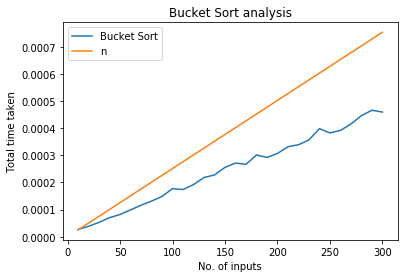

In [44]:
#  7.     Write a program to implement the Bucket sort algorithm.
#  Verify that it runs in linear time for inputs coming from a uniform distribution.

## Bucket Sort ########################


def insertionSort(b):
    for i in range(1, len(b)):
        up = b[i]
        j = i - 1
        while j >= 0 and b[j] > up:
            b[j + 1] = b[j]
            j -= 1
        b[j + 1] = up
    return b



def BucketSort(x):
    arr = []
    slot_num = len(x)  # 10 means 10 slots, each
    # slot's size is 0.1
    for i in range(slot_num):
        arr.append([])

    # Put array elements in different buckets
    for j in x:
        index_b = int(slot_num * j)
        arr[index_b].append(j)

    # Sort individual buckets
    for i in range(slot_num):
        arr[i] = insertionSort(arr[i])

    # concatenate the result
    k = 0
    for i in range(slot_num):
        for j in range(len(arr[i])):
            x[k] = arr[i][j]
            k += 1
    return x


def plot(t):
    n = []
    for i in range(1, 31):
        n.append((i*10))
    newArr = []
    narr = []
    for i in range(len(n)):
        arr = n[i]*np.log2(n[i]) / 10**5.6
        arrn = n[i] /10**5.6
        narr.append(arrn)
        newArr.append(arr)
    plt.plot(n, t, label="Bucket Sort")
    # plt.plot(n, newArr, label="nlogn")
    plt.plot(n, narr, label="n")
    plt.xlabel('No. of inputs')
    plt.ylabel('Total time taken')
    plt.title('Bucket Sort analysis')
    plt.legend()
    plt.show()

# main function
if __name__=="__main__":
    for i in range(2):
        randarr1 = np.random.random(20)
        print(f"Random generated array : {randarr1}")   
        # print(BucketSort(randarr1))
        # sorted = BucketSort(randarr1)
        # print(f"Sorted array : {sorted}")
        print(f"Sorted array : {BucketSort(randarr1)}")

    tval = []
    for i in range(1, 31):
        randarr = np.random.random(i*10)
        n = len(randarr) 
        start_time = time.perf_counter()
        BucketSort(randarr)
        timeTaken = (time.perf_counter() - start_time)
        tval.append(timeTaken)
        # print(timeTaken, end=" Nano-seconds\n")
    # print(tval)
    plot(tval)

In [84]:
# A Dynamic Programming based Python Program for 0-1 Knapsack problem Returns the maximum value that can be put in a knapsack of capacity W
import numpy as np

def knapSack(W, wt, val, n):
	K = [[0 for x in range(W + 1)] for x in range(n + 1)]
	
	# Build table K[][] in bottom up manner
	for i in range(n + 1):
		for w in range(W + 1):
			if i == 0 or w == 0:
				K[i][w] = 0
			elif wt[i-1] <= w:
				K[i][w] = max(val[i-1]
						+ K[i-1][w-wt[i-1]],
							K[i-1][w])
			else:
				K[i][w] = K[i-1][w]		
	return K[n][W]

if __name__ == "__main__":
	# Driver code
	# val = [60, 100, 120]
	val = np.array(np.random.randint(50,200,10))
	print(f"Values of items : {val}")
	# wt = [10, 20, 30]
	wt = np.array(np.random.randint(50,200,10))
	# W = 50
	W = np.random.randint(100,1000)
	print(f"Weight of items : {wt}")
	print(f"Max Capacity : {W}")
	n = len(val)
	totalVal = knapSack(W, wt, val, n)
	print(f"Max value added : {totalVal}")


Values of items : [ 94 139 100 142  69 171  97  93  50  58]
Weight of items : [154  57 121 120 194  70  57 130  72 128]
Max Capacity : 492
Max value added : 649


In [34]:
# Fractional Knapsack Problem implementation using Greedy Technique
import numpy as np

class ItemValue:
	def __init__(self, wt, val, capacity):
		self.wt = wt
		self.val = val
		self.capacity = capacity
		self.cost = val // wt

	def __lt__(self, other):
		return self.cost < other.cost

# Greedy Approach
class FractionalKnapSack:
	@staticmethod
	def getMaxValue(wt, val, capacity):
		iVal = []
		for i in range(len(wt)):
			iVal.append(ItemValue(wt[i], val[i], i))
		# sorting items by value
		iVal.sort(reverse=True)
		totalValue = 0
		itemWeight = []
		itemValue = []
		for i in iVal:
			curWt = int(i.wt)
			# print(curWt)
			curVal = int(i.val)
			# print(curVal)
			if capacity - curWt >= 0:
				capacity -= curWt
				totalValue += curVal
				itemValue.append(curVal)
				itemWeight.append(f"{curWt} : 100%")
			else:
				fraction = capacity / curWt
				totalValue += curVal * fraction
				capacity = int(capacity - (curWt * fraction))
				itemValue.append(int(curVal*fraction))
				itemWeight.append(f"{curWt} : {int(fraction*100)}%")
				break
		# print(itemWeight)
		# print(itemValue)
		return totalValue,itemWeight,itemValue


# Driver Code
if __name__ == "__main__":
	wt = np.array(np.random.randint(50,200,10))
	# wt = [10, 40, 20, 30]
	val = np.array(np.random.randint(50,200,10))
	# val = [60, 40, 100, 120]
	capacity = np.random.randint(100,1000)
	# Function call
	maxValue = FractionalKnapSack.getMaxValue(wt, val, capacity)
	print("Fractional Knapsack implementation")
	print(f"weight of items = {wt}")
	print(f"Values of items = {val}")
	print(f"Total capacity = {capacity}")
	print(f"Picked weight in Knapsack = {maxValue[1]}")
	print(f"Picked values in Knapsack = {maxValue[2]}")
	print(f"Maximum value in Knapsack = {maxValue[0]}")


Fractional Knapsack implementation
weight of items = [ 86 145  67 191  82 169  70  82 125 120]
Values of items = [155 150 175 195  90 162 133 188  74 176]
Total capacity = 579
Picked weight in Knapsack = ['67 : 100%', '82 : 100%', '86 : 100%', '145 : 100%', '191 : 100%', '82 : 9%']
Picked values in Knapsack = [175, 188, 155, 150, 195, 8]
Maximum value in Knapsack = 871.780487804878


In [31]:
# Python Program for Floyd Warshall Algorithm Number of vertices in the graph
import time

V = 4
INF = 99999

def floydWarshall(graph):
	dist = list(map(lambda i: list(map(lambda j: j, i)), graph))
	for k in range(V):
		for i in range(V):
			# Pick all vertices as destination for the above picked source
			for j in range(V):
				# If vertex k is on the shortest path from i to j, then update the value of dist[i][j]
				dist[i][j] = min(dist[i][j], dist[i][k] + dist[k][j])
	printSolution(dist)

def printSolution(dist):
	print ("Following matrix shows the shortest distances between every pair of vertices")
	for i in range(V):
		for j in range(V):
			if(dist[i][j] == INF):
				print ("%7s" % ("INF"),end=" ")
			else:
				print ("%7d\t" % (dist[i][j]),end=' ')
			if j == V-1:
				print ()

if __name__ == "__main__":
    graph = [[0, 5, INF, 10],
            [INF, 0, 3, INF],
            [10, INF, 0, 1],
            [INF, 11, INF, 0]]
    floydWarshall(graph)


Following matrix shows the shortest distances between every pair of vertices
      0	       5	       8	       9	 
     13	       0	       3	       4	 
     10	      12	       0	       1	 
     24	      11	      14	       0	 


In [28]:
# Python Program for Floyd Warshall Algorithm Number of vertices in the graph
# ******************************************** Graph plotting ****************************************
import time

V = 4
INF = 99999

def floydWarshall(graph):
	dist = list(map(lambda i: list(map(lambda j: j, i)), graph))
	for k in range(V):
		for i in range(V):
			# Pick all vertices as destination for the above picked source
			for j in range(V):
				# If vertex k is on the shortest path from i to j, then update the value of dist[i][j]
				dist[i][j] = min(dist[i][j], dist[i][k] + dist[k][j])
	printSolution(dist)

def printSolution(dist):
	print ("Following matrix shows the shortest distances between every pair of vertices")
	for i in range(V):
		for j in range(V):
			if(dist[i][j] == INF):
				print ("%7s" % ("INF"),end=" ")
			else:
				print ("%7d\t" % (dist[i][j]),end=' ')
			if j == V-1:
				print ()

if __name__ == "__main__":
    graph = [[0, 5, INF, 10],
            [INF, 12, 3, INF],
            [10, INF, 0, 1],
            [INF, 11, INF, 0]
            ]
	# startTime = time.time_ns()
    floydWarshall(graph)


Following matrix shows the shortest distances between every pair of vertices
      0	       5	       8	       9	 
     13	      12	       3	       4	 
     10	      12	       0	       1	 
     24	      11	      14	       0	 


In [ ]:
# TSP using DP

In [1]:
# Give an O(nlgk) time algorithm to merge k sorted lists into 1 sorted
# list, where n is the total number of elements in all the input lists.

import heapq
from heapq import heappop, heappush
 
 
# A Linked List Node
class Node:
    def __init__(self, data, next=None):
        self.data = data
        self.next = next
 
    # Override the `__lt__()` function to make `Node` class work with min-heap
    def __lt__(self, other):
        return self.data < other.data
 
 
# Utility function to print contents of a linked list
def printList(node):
    while node:
        print(node.data, end=' —> ')
        node = node.next
 
    print('None')
 
 
# The main function to merge given `k` sorted linked lists.
# It takes a list of lists `list` of size `k` and generates the sorted output
def mergeKLists(lists):
 
    # create a min-heap using the first node of each list
    pq = [x for x in lists]
    heapq.heapify(pq)
 
    # take two pointers, head and tail, where the head points to the first node
    # of the output list and tail points to its last node
    head = last = None
 
    # run till min-heap is empty
    while pq:
 
        # extract the minimum node from the min-heap
        min = heappop(pq)
 
        # add the minimum node to the output list
        if head is None:
            head = min
            last = min
        else:
            last.next = min
            last = min
 
        # take the next node from the "same" list and insert it into the min-heap
        if min.next:
            heappush(pq, min.next)
 
    # return head node of the merged list
    return head
 
 
if __name__ == '__main__':
 
    # total number of linked lists
    k = 3
    # a list to store the head nodes of the linked lists
    lists = [None] * k
 
    lists[0] = Node(1)
    lists[0].next = Node(5)
    lists[0].next.next = Node(7)
 
    lists[1] = Node(2)
    lists[1].next = Node(3)
    lists[1].next.next = Node(6)
    lists[1].next.next.next = Node(9)
 
    lists[2] = Node(4)
    lists[2].next = Node(8)
    lists[2].next.next = Node(10)
 
    # Merge all lists into one
    head = mergeKLists(lists)
    printList(head)

1 —> 2 —> 3 —> 4 —> 5 —> 6 —> 7 —> 8 —> 9 —> 10 —> None
